# <center> Titanic Data 

# Feature Selection / Feature Engineering

## Chi-Squared Statistic

In [1]:
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

independet_var = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
target_var = df['Survived']

scores = chi2(independet_var,target_var)

f_score = pd.Series(scores[0],index=independet_var.columns)
p_values = pd.Series(scores[1],index=independet_var.columns)

print("Best features selected are:\n", list(p_values[p_values <0.05].index))

Best features selected are:
 ['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Cabin', 'Embarked']


   Features        Score Selected
0    Pclass    30.873699     True
1       Sex    92.702447     True
2       Age    30.990409     True
3     SibSp     2.581865    False
4     Parch    10.097499     True
5      Fare  4518.319091     True
6     Cabin  1016.325842     True
7  Embarked    10.202525     True


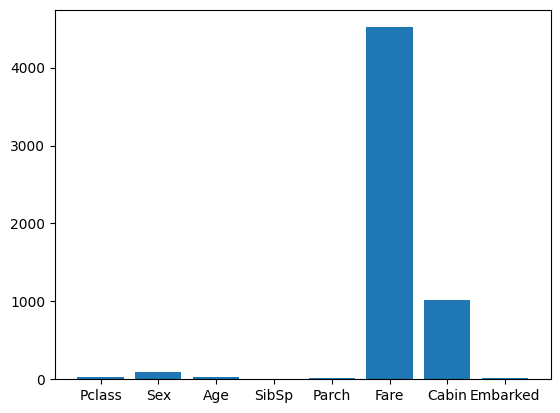

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
import pandas as pd

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

independet_var = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
target_var = df['Survived']

## K defines number of features
best_feature_chi = SelectKBest(chi2, k=7)

Kbest_Feature = best_feature_chi.fit_transform(independet_var, target_var)

features = independet_var.columns

chi_df = pd.DataFrame()
chi_df['Features'] = independet_var.columns
chi_df['Score'] = best_feature_chi.scores_
chi_df['Selected'] = chi_df['Features'].apply(lambda x: 'True' if x in list(features[best_feature_chi.get_support()]) else 'False')
print(chi_df)

pyplot.bar(chi_df['Features'],chi_df['Score'])
pyplot.show()

## Feature Importance

                Features      Score Selected
0          fixed acidity   0.024991     True
1       volatile acidity  -1.083590     True
2            citric acid  -0.182564     True
3         residual sugar   0.016331     True
4              chlorides  -1.874225     True
5    free sulfur dioxide   0.004361     True
6   total sulfur dioxide  -0.003265     True
7                density -17.881164     True
8                     pH  -0.413653     True
9              sulphates   0.916334     True
10               alcohol   0.276198     True


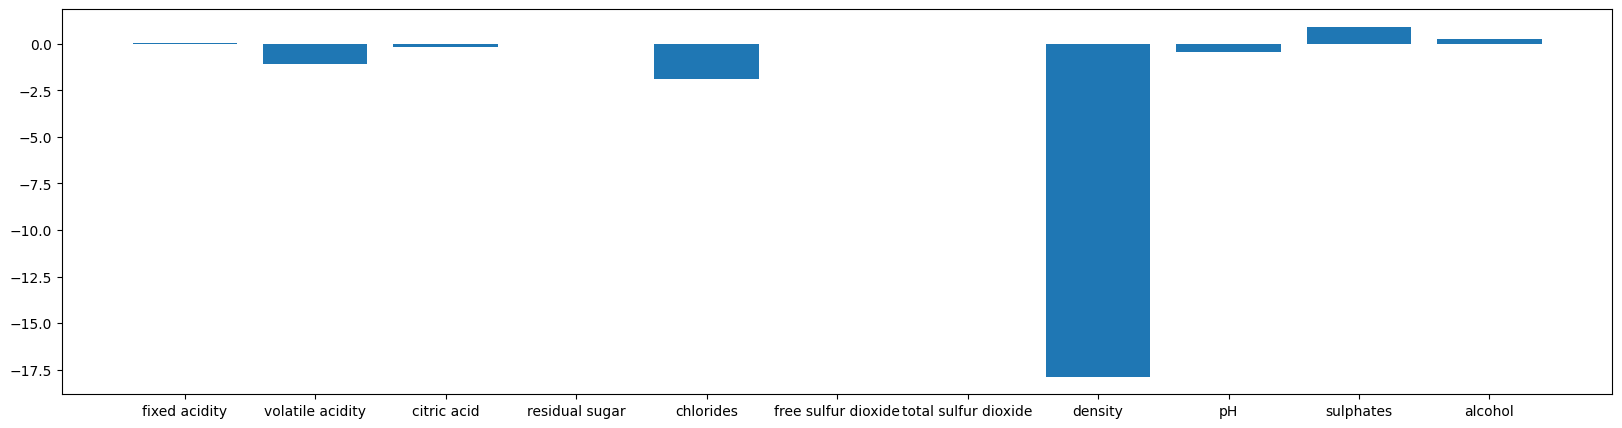

In [3]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import pandas as pd
import numpy as np

df = pd.read_csv("winequality-red.csv")

model = LinearRegression()

independet_var = df.iloc[:,:-1]
target_var = df.iloc[:,-1:]

model.fit(independet_var,target_var)
model.coef_

LR_df = pd.DataFrame()
LR_df['Features'] = independet_var.columns
LR_df['Score'] = ((model.coef_).reshape(11,1))
LR_df['Selected'] = np.where(LR_df['Score']==0.000,'False','True')
print(LR_df)

plt.figure(figsize=(20, 5))
pyplot.bar(LR_df['Features'],LR_df['Score'])
pyplot.show()

   Features     Score Selected
0    Pclass  0.115463     True
1       Sex  0.300459     True
2       Age  0.240326     True
3     SibSp  0.055651     True
4     Parch  0.030374     True
5      Fare  0.181573     True
6     Cabin  0.064225     True
7  Embarked  0.011928     True


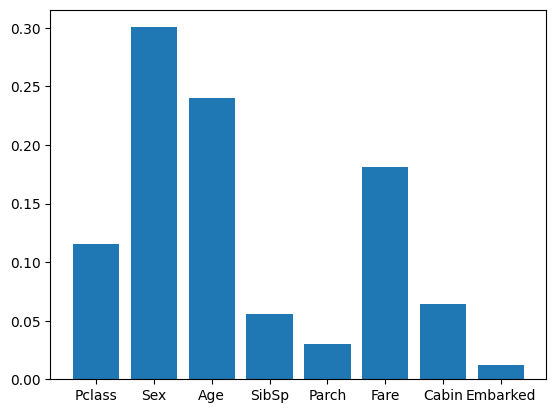

In [4]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import pandas as pd
import numpy as np

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

independet_var = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
target_var = df['Survived']

model = DecisionTreeClassifier()

model.fit(independet_var,target_var)

tree_df = pd.DataFrame()
tree_df['Features'] = independet_var.columns
tree_df['Score'] = model.feature_importances_
tree_df['Selected'] = np.where(tree_df['Score']==0.000,'False','True')
print(tree_df)

pyplot.bar(tree_df['Features'],tree_df['Score'])
pyplot.show()

## Recursive Feature Elimination (RFE)

In [5]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
import pandas as pd

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

independet_var = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
target_var = df['Survived']

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(independet_var,target_var)

rfe_df = pd.DataFrame()
rfe_df['Features'] = independet_var.columns
rfe_df['Ranking'] = rfe.ranking_
rfe_df['Selected'] = rfe.support_

print(rfe_df)

   Features  Ranking  Selected
0    Pclass        1      True
1       Sex        1      True
2       Age        1      True
3     SibSp        2     False
4     Parch        3     False
5      Fare        1      True
6     Cabin        1      True
7  Embarked        4     False
